In [1]:
import pandas as pd
import urllib.request
import re

data = pd.read_csv('./data/split/after_up_BTC1.csv', error_bad_lines=False)
#data = data.append(pd.read_csv('../../news/scraping_result/kr/2017_up1/2017_up1_(KR)Tokenpost.csv', error_bad_lines=False))


In [2]:
data = data.drop('Unnamed: 0',axis = 1)

In [3]:
data

,crypto,gubun,datetime,username,retweets,favorites,hashtags,text
0,NaN,up,2017-07-20 20:00:01,CryptoHourly,0,0,NaN,"@#1, Bitcoin with unit price of $2,635.76, mar..."
1,NaN,up,2017-07-20 20:00:01,drag_0nsden,0,1,#BTC #BTC #ETH #XMR #Bitcoin #Bitcoin #Ethereu...,Exchange cryptocurrency at the best rate: http...
2,NaN,up,2017-07-20 20:00:02,coinstats,0,0,#Bitcoin #Bitcoin #BTC #BTC,"Bitcoin - BTC Price: $2,635.76 Change in 1h: +..."
3,NaN,up,2017-07-20 20:00:02,cryptonirvana,0,0,#BIP91 #UASF #BIP148 #bitcoin #bitcoin #segwit,Last 144 blocks signaling #BIP91: 88.88% (Δ1h ...
4,NaN,up,2017-07-20 20:00:02,bitcoinrate247,0,0,NaN,"Average Bitcoin market price is: USD 2,643.01,..."
...,...,...,...,...,...,...,...,...
4245,NaN,up,2017-07-20 23:59:18,degengambleh,1,0,#historyinmaking #segwit #bitcoin #bitcoin,And the last block! #historyinmaking #segwit #...
4246,NaN,up,2017-07-20 23:59:28,bigtmerchant,0,1,NaN,Research Finds Design Flaws in Scaling Proposa...
4247,NaN,up,2017-07-20 23:59:34,Ars0nic,0,1,#bitcoin #bitcoin #crypto #moon,Just saying $btcusd #bitcoin #crypto #moon
4248,NaN,up,2017-07-20 23:59:42,CryptoNewswire,0,2,#decred #bitcoin #bitcoin #blockchain,DCR/BTC 2 Month Low - Decred (DCR) price reach...


In [4]:
pattern = '(http|ftp|https)://(?:[-\w.]|(?:%[\da-fA-F]{2}))+'

data['text'] = data['text'].apply(lambda x : re.sub(pattern=pattern, repl='', string=x ))
# text = re.sub(pattern=pattern, repl='', string=text)

In [5]:
text = data[['text']]
text['text'] = text.apply(lambda row: row['text'].replace("/"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("-"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("—"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("*"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("…"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("\\"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("#"," "), axis=1)



/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [6]:
import nltk
text['text'] = text.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)
text['text'] = text['text'].apply(lambda x : [word.lower().replace("-","") for word in x])
text['text'] = text['text'].apply(lambda x : [word for word in x if word])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [7]:
text['text']

0       [@, 1, ,, bitcoin, with, unit, price, of, $, 2...
1       [exchange, cryptocurrency, at, the, best, rate...
2       [bitcoin, btc, price, :, $, 2,635.76, change, ...
3       [last, 144, blocks, signaling, bip91, :, 88.88...
4       [average, bitcoin, market, price, is, :, usd, ...
                              ...                        
4245    [and, the, last, block, !, historyinmaking, se...
4246    [research, finds, design, flaws, in, scaling, ...
4247     [just, saying, $, btcusd, bitcoin, crypto, moon]
4248    [dcr, btc, 2, month, low, decred, (, dcr, ), p...
4249                               [bitcoinだけが無双しとるな。他のは]
Name: text, Length: 4250, dtype: object

In [8]:
from nltk.tag import pos_tag

text['pos tag'] = text.apply(lambda row: pos_tag(row['text']), axis=1)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
# 불용어 품사 제거
text['text'] = text['pos tag'].apply(lambda x: [word[0] for word in x if word[1] not in ('CC','CD','DT','EX','IN','LS','MD','PRP','PRP$','RB','TO','UH','WDT','WP','WP$','WRB')])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
text['text'] = text['text'].apply(lambda x: [word for word in x if word not in (stop)])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
import csv
stopword_list =[]
f = open('../stopword/stop_en.txt', 'r')
reader = csv.reader(f)
for row in reader:
    #print(row[0])
    stopword_list.append(row[0])
    #pass
f.close()

text['text'] = text['text'].apply(lambda x: [word for word in x if word not in stopword_list])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [12]:
text['text']

0       [,, bitcoin, unit, price, $, ,, market, cap, $...
1       [exchange, cryptocurrency, best, :, btc, eth, ...
2       [bitcoin, btc, price, :, $, change, :, %, mark...
3       [last, blocks, signaling, bip91, :, %, (, δ1h,...
4       [average, bitcoin, market, price, :, usd, ,, eur]
                              ...                        
4245    [last, block, !, historyinmaking, segwit, bitc...
4246    [research, finds, design, flaws, scaling, prop...
4247           [saying, $, btcusd, bitcoin, crypto, moon]
4248    [dcr, btc, month, low, decred, (, dcr, ), pric...
4249                               [bitcoinだけが無双しとるな。他のは]
Name: text, Length: 4250, dtype: object

In [13]:
pattern=re.compile(r'\.')
print(pattern.search('abc.de'))

text['text'] = text['text'].apply(lambda x: [word for word in x if pattern.search(word)== None])

<re.Match object; span=(3, 4), match='.'>


/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [14]:
number_pattern=re.compile(r'[0-9]\,[0-9]')
text['text'] = text['text'].apply(lambda x: [word for word in x if number_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
native_number_pattern=re.compile(r'[0-9]')
text['text'] = text['text'].apply(lambda x: [word for word in x if native_number_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
star_pattern=re.compile(r'[a-z0-9*]\*[a-z0-9*]')
text['text'] = text['text'].apply(lambda x: [word for word in x if star_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
from nltk.stem import WordNetLemmatizer
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x]) # 동사 
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='a') for word in x]) # 형용사
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='n') for word in x]) # 명사
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='r') for word in x]) # 부사

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [18]:
# text['text'] =  text['text'].apply(lambda x : [re.sub('[^a-zA-Z0-9]',' ',word).strip() for word in x])

In [19]:
tokenized_doc = text['text'].apply(lambda x: [word for word in x if len(word) > 3])
#print(tokenized_doc)

In [20]:
article_contents = tokenized_doc.values.tolist()

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict

In [22]:
tokenized_doc_tfidf = tokenized_doc.apply(lambda x : ' '.join(x))

In [23]:
article_contents_tfidf = tokenized_doc_tfidf.values.tolist()

In [24]:
vectorizer = TfidfVectorizer()
sp_matrix = vectorizer.fit_transform([ " ".join(article_contents_tfidf) ])

In [25]:
word2id = defaultdict(lambda: 0)

In [26]:
for idx, feature in enumerate(vectorizer.get_feature_names()):
    word2id[feature] = idx

In [27]:
tf_idf_result = []
token_list = []
for i, sent in enumerate([" ".join(article_contents_tfidf)]):
    for token in sent.split() :
        if token not in token_list :
            temp=[]
            temp.append(token)
            temp.append(sp_matrix[i, word2id[token]])
            token_list.append(token)
            tf_idf_result.append(temp)

In [28]:
len(tf_idf_result)

5263

In [29]:
tf_idf_value =[]
for tf_idf_element in tf_idf_result :
    tf_idf_value.append(tf_idf_element[1])
print(len(tf_idf_value))  ## tf-idf 값을 배열에 담음

5263


In [30]:
from gensim import corpora
tokenized_doc = [d.split() for d in token_list]
dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[1]) 

[(1, 1)]


In [31]:
sentences = article_contents

In [32]:
from gensim.models import Word2Vec

In [33]:
model = Word2Vec(sentences, min_count=1)

In [34]:
len(model.wv.vocab)

5263

In [35]:
X = model[model.wv.vocab]

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [36]:
from nltk.cluster import KMeansClusterer
import nltk
NUM_CLUSTERS=4
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
#kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.euclidean_distance, repeats=25)
#euclidean_distance
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
#print(X)
#print(assigned_clusters)

In [37]:
import pandas as pd
import numpy as np
temp_heder = ['raw_data','word','cluster','centroid','distance','tfidf','score','closer#']
temp_cluster_result = pd.DataFrame(columns=temp_heder)

In [38]:
temp_cluster_result['word'] = list(model.wv.vocab)

In [39]:
temp_cluster_result['cluster'] = assigned_clusters

In [40]:
temp_cluster_result['raw_data'] = X.tolist()

In [41]:
#temp_cluster_result['raw_data']
temp_cluster_result['centroid'] = temp_cluster_result['cluster'].apply(lambda x : kclusterer.means()[x])

In [42]:
from sklearn.metrics import pairwise_distances

In [43]:
cosine_centroid_list = []
for cosine_centroid in temp_cluster_result['centroid'] :
    cosine_centroid_list.append(cosine_centroid.tolist())

In [44]:
len(cosine_centroid_list)

5263

In [45]:
temp_distance = pairwise_distances(X,cosine_centroid_list, metric='cosine')

In [46]:
sum(temp_distance[3])

286.9519037216691

In [47]:
import scipy.spatial.distance as dist

In [48]:
dist.cosine(X[0],cosine_centroid_list[0])

0.007759455871185539

In [49]:
dist.euclidean(X[0],cosine_centroid_list[0])

5.803736163293816

In [50]:
temp_cluster_result['distance'] = temp_cluster_result.apply(lambda x : dist.cosine(x.raw_data,x.centroid),axis=1)

In [51]:
temp_cluster_result['tfidf'] = tf_idf_value
temp_cluster_result['score'] = temp_cluster_result.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result

In [52]:
temp_cluster_result[temp_cluster_result['cluster']==0].sort_values(by=['score']).head(20)  # 긍정

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
0,"[-0.01592699997127056, 0.6265558004379272, -0....",bitcoin,0,"[-0.0046183695, 0.023203788, -0.037396513, 0.0...",0.007759,0.955936,0.051824,NaN
133,"[-0.048220518976449966, 0.4050474464893341, -0...",blockchain,0,"[-0.0046183695, 0.023203788, -0.037396513, 0.0...",0.000588,0.080662,0.919926,NaN
104,"[-0.027964415028691292, 0.3272094428539276, -0...",news,0,"[-0.0046183695, 0.023203788, -0.037396513, 0.0...",0.003620,0.071095,0.932525,NaN
7,"[-0.008300717920064926, 0.267368882894516, -0....",ethereum,0,"[-0.0046183695, 0.023203788, -0.037396513, 0.0...",0.002383,0.069219,0.933164,NaN
105,"[-0.0405900813639164, 0.2469908744096756, -0.3...",crypto,0,"[-0.0046183695, 0.023203788, -0.037396513, 0.0...",0.000456,0.045583,0.954873,NaN
5,"[-0.046377673745155334, 0.2914724051952362, -0...",cryptocurrency,0,"[-0.0046183695, 0.023203788, -0.037396513, 0.0...",0.000210,0.040706,0.959504,NaN
15,"[-0.06735651195049286, 0.3076196312904358, -0....",segwit,0,"[-0.0046183695, 0.023203788, -0.037396513, 0.0...",0.007654,0.047459,0.960195,NaN
3,"[-0.04432595893740654, 0.27357226610183716, -0...",market,0,"[-0.0046183695, 0.023203788, -0.037396513, 0.0...",0.000311,0.030389,0.969922,NaN
110,"[-0.05199357867240906, 0.26903030276298523, -0...",free,0,"[-0.0046183695, 0.023203788, -0.037396513, 0.0...",0.000149,0.022885,0.977263,NaN
482,"[-0.010638332925736904, 0.19617626070976257, -...",hour,0,"[-0.0046183695, 0.023203788, -0.037396513, 0.0...",0.006660,0.028325,0.978335,NaN


In [53]:
temp_cluster_result[temp_cluster_result['cluster']==1].sort_values(by=['score']).head(30)  # 투자 

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
710,"[-0.19236154854297638, 0.2338520586490631, -0....",year,1,"[-0.014860763, 0.011167693, -0.033989564, 0.04...",0.002085,0.025136,0.976949,NaN
975,"[-0.1700287014245987, 0.1218060776591301, -0.3...",bubble,1,"[-0.014860763, 0.011167693, -0.033989564, 0.04...",0.000121,0.020447,0.979674,NaN
978,"[-0.22414861619472504, 0.11822972446680069, -0...",mania,1,"[-0.014860763, 0.011167693, -0.033989564, 0.04...",0.000666,0.018946,0.981720,NaN
690,"[-0.19477035105228424, 0.15527191758155823, -0...",wave,1,"[-0.014860763, 0.011167693, -0.033989564, 0.04...",0.000293,0.018571,0.981722,NaN
977,"[-0.2192433625459671, 0.11562328785657883, -0....",tulip,1,"[-0.014860763, 0.011167693, -0.033989564, 0.04...",0.000948,0.018383,0.982564,NaN
976,"[-0.196157768368721, 0.0911169946193695, -0.36...",dwarf,1,"[-0.014860763, 0.011167693, -0.033989564, 0.04...",0.001952,0.017821,0.984131,NaN
979,"[-0.20798832178115845, 0.12284590303897858, -0...",elliott,1,"[-0.014860763, 0.011167693, -0.033989564, 0.04...",0.000306,0.016132,0.984174,NaN
980,"[-0.14747299253940582, 0.12537208199501038, -0...",analyst,1,"[-0.014860763, 0.011167693, -0.033989564, 0.04...",0.000259,0.012943,0.987316,NaN
1924,"[-0.018567480146884918, 0.027993489056825638, ...",cnbc,1,"[-0.014860763, 0.011167693, -0.033989564, 0.04...",0.005420,0.002814,1.002606,NaN
1621,"[-0.000454088905826211, 0.00400086073204875, -...",financ,1,"[-0.014860763, 0.011167693, -0.033989564, 0.04...",0.041391,0.000188,1.041203,NaN


In [54]:
temp_cluster_result[temp_cluster_result['cluster']==2].sort_values(by=['score']).head(20)   # 기술

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
78,"[0.0034286153968423605, -0.002860735170543194,...",litecoin_stream,2,"[0.00033163137, -0.0013953468, 0.0025252034, -...",0.039032,0.002063,1.036969,NaN
4716,"[0.005978035740554333, -0.005698807071894407, ...",coinigy,2,"[0.00033163137, -0.0013953468, 0.0025252034, -...",0.049882,0.000188,1.049695,NaN
2535,"[0.0036917184479534626, -0.0004276849795132875...",garbage,2,"[0.00033163137, -0.0013953468, 0.0025252034, -...",0.074642,0.000563,1.074079,NaN
5249,"[0.0036140051670372486, -0.009378570131957531,...",gqunfj,2,"[0.00033163137, -0.0013953468, 0.0025252034, -...",0.079480,0.000188,1.079293,NaN
1925,"[0.004488265607506037, -0.003515812801197171, ...",bestchange,2,"[0.00033163137, -0.0013953468, 0.0025252034, -...",0.081695,0.000563,1.081132,NaN
3257,"[-0.0014371899887919426, -0.004355399869382381...",remain,2,"[0.00033163137, -0.0013953468, 0.0025252034, -...",0.083988,0.000750,1.083238,NaN
1553,"[-0.002440037904307246, -0.00670915562659502, ...",indice,2,"[0.00033163137, -0.0013953468, 0.0025252034, -...",0.093522,0.000188,1.093334,NaN
4714,"[0.0004503491218201816, -0.0007539320504292846...",elite,2,"[0.00033163137, -0.0013953468, 0.0025252034, -...",0.108171,0.000188,1.107983,NaN
1354,"[0.00165331712923944, -0.0012081994209438562, ...",時点の情報,2,"[0.00033163137, -0.0013953468, 0.0025252034, -...",0.140056,0.000188,1.139868,NaN
2089,"[0.0011138333939015865, -0.008607914671301842,...",magnate,2,"[0.00033163137, -0.0013953468, 0.0025252034, -...",0.145177,0.000375,1.144801,NaN


In [55]:
temp_cluster_result[temp_cluster_result['cluster']==3].sort_values(by=['score']).head(20)  # 비즈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
870,"[0.13814187049865723, 0.14040741324424744, 0.0...",surge,3,"[0.022521686, 0.023016615, 0.009993984, -0.012...",0.002046,0.080099,0.921947,NaN
52,"[0.13093234598636627, 0.1687348335981369, 0.00...",high,3,"[0.022521686, 0.023016615, 0.009993984, -0.012...",0.006719,0.073346,0.933373,NaN
270,"[0.14685402810573578, 0.14894838631153107, 0.0...",month,3,"[0.022521686, 0.023016615, 0.009993984, -0.012...",0.000815,0.054025,0.946791,NaN
171,"[0.15595120191574097, 0.14709261059761047, 0.0...",tech,3,"[0.022521686, 0.023016615, 0.009993984, -0.012...",0.002932,0.046334,0.956598,NaN
2,"[0.08988334238529205, 0.17906029522418976, -0....",price,3,"[0.022521686, 0.023016615, 0.009993984, -0.012...",0.096290,0.130560,0.965731,NaN
1454,"[0.15548720955848694, 0.11454828828573227, 0.1...",outlook,3,"[0.022521686, 0.023016615, 0.009993984, -0.012...",0.014911,0.041081,0.973830,NaN
1455,"[0.14118409156799316, 0.09980228543281555, 0.1...",improve,3,"[0.022521686, 0.023016615, 0.009993984, -0.012...",0.018977,0.040518,0.978458,NaN
1974,"[0.002888742135837674, 0.0011387548875063658, ...",twet,3,"[0.022521686, 0.023016615, 0.009993984, -0.012...",0.179618,0.000375,1.179243,NaN
1918,"[0.0045457156375050545, 0.006097887642681599, ...",improves_stream,3,"[0.022521686, 0.023016615, 0.009993984, -0.012...",0.246646,0.000750,1.245896,NaN
3085,"[0.005357575137168169, -0.00214216485619545, 0...",cryptofinancing,3,"[0.022521686, 0.023016615, 0.009993984, -0.012...",0.255081,0.000375,1.254706,NaN


In [56]:
y_km = temp_cluster_result['cluster'].values

In [57]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style

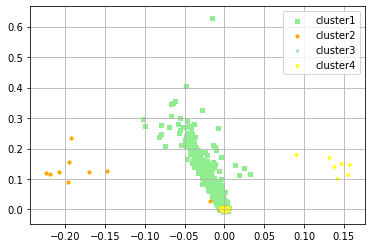

In [58]:
plt.scatter(X[y_km==0,0],X[y_km==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[y_km==1,0],X[y_km==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[y_km==2,0],X[y_km==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[y_km==3,0],X[y_km==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[y_km==4,0],X[y_km==4,1],c='red',marker='v',s=10 , label='cluster5')
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',marker='*',s=30 , label='center cluster')

plt.legend()
plt.grid(True)
plt.show()

In [59]:
len(temp_cluster_result[temp_cluster_result['cluster']==0]) # 긍정

4980

In [60]:
len(temp_cluster_result[temp_cluster_result['cluster']==1]) # 투자

111

In [61]:
len(temp_cluster_result[temp_cluster_result['cluster']==2]) # 기술

128

In [62]:
len(temp_cluster_result[temp_cluster_result['cluster']==3]) # 비즈

44

In [63]:
temp_cluster_result['category'] = 3 # 1 영문뉴스, 2 국문뉴스 , 3 twitter

In [64]:
#temp_cluster_result['label'] = 2 # 1 영문뉴스, 2 국문뉴스 , 3 twitter

In [65]:
temp_cluster_result.loc[temp_cluster_result['cluster']==0,'label'] = 1 # 긍정

In [66]:
temp_cluster_result.loc[temp_cluster_result['cluster']==1,'label'] = 11 # 투자

In [67]:
temp_cluster_result.loc[temp_cluster_result['cluster']==2,'label']  = 9 # 기술

In [68]:
temp_cluster_result.loc[temp_cluster_result['cluster']==3,'label'] = 7 # 비즈

In [69]:
from sklearn import cluster
from sklearn import metrics
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)

KMeans(n_clusters=4)

In [70]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [71]:
kmeans.inertia_

135.37135314941406

In [72]:
print ("Cluster id labels for inputted data")
print (labels)

Cluster id labels for inputted data
[3 0 1 ... 0 0 0]


In [73]:
cluster_values= list(model.wv.vocab)

In [74]:
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))

Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):
-135.37136840820312


In [75]:
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')

In [76]:
print ("Silhouette_score: ")
print (silhouette_score)

Silhouette_score: 
0.69513583


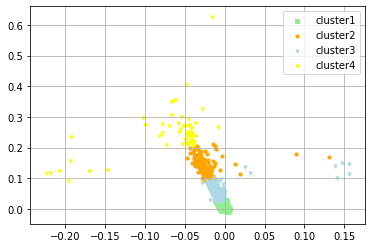

In [77]:
kmeans_label = kmeans.labels_

plt.scatter(X[kmeans_label==0,0],X[kmeans_label==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[kmeans_label==1,0],X[kmeans_label==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[kmeans_label==2,0],X[kmeans_label==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[kmeans_label==3,0],X[kmeans_label==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[kmeans_label==4,0],X[kmeans_label==4,1],c='red',marker='v',s=10 , label='cluster5')

plt.legend()
plt.grid(True)
plt.show()

In [78]:
temp_cluster_result1 = pd.DataFrame(columns=temp_heder)
temp_cluster_result1['word'] = list(model.wv.vocab)
temp_cluster_result1['cluster'] = kmeans_label

In [79]:
#temp_cluster_result1[temp_cluster_result1['cluster']==0].head(30) #시도 및 혼돈  # 혼란 부정적 
temp_cluster_result1['raw_data'] = X.tolist()

In [80]:
temp_cluster_result1['centroid'] = temp_cluster_result1['cluster'].apply(lambda x : centroids[x])

In [81]:
euclidean_centroid_list = []
for euclidean_centroid in temp_cluster_result1['centroid'] :
    euclidean_centroid_list.append(euclidean_centroid.tolist())

In [82]:
temp_distance1 = pairwise_distances(X,euclidean_centroid_list, metric='euclidean')

In [83]:
import scipy.spatial.distance as dist

In [84]:
temp_cluster_result1['distance'] = temp_cluster_result1.apply(lambda x : dist.euclidean(x.raw_data,x.centroid),axis=1)

In [85]:
temp_cluster_result1['tfidf'] = tf_idf_value
temp_cluster_result1['score'] = temp_cluster_result1.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result1

In [86]:
temp_cluster_result1[temp_cluster_result1['cluster']==0].sort_values('score',ascending=False).nsmallest(50,'score') # 투자

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
4564,"[0.0013832742115482688, 0.009495590813457966, ...",woii,0,"[-0.0021105222, 0.010263882, -0.016584665, 0.0...",0.025875,0.000188,1.025687,NaN
2553,"[-0.00021660371567122638, 0.006017164792865515...",absurdity,0,"[-0.0021105222, 0.010263882, -0.016584665, 0.0...",0.025989,0.000188,1.025802,NaN
3486,"[-0.003336801193654537, 0.00577851478010416, -...",milli,0,"[-0.0021105222, 0.010263882, -0.016584665, 0.0...",0.026151,0.000188,1.025963,NaN
5251,"[-0.005879705771803856, 0.009571719914674759, ...",resign,0,"[-0.0021105222, 0.010263882, -0.016584665, 0.0...",0.026189,0.000188,1.026002,NaN
2998,"[-0.000977170653641224, 0.005739138461649418, ...",porque,0,"[-0.0021105222, 0.010263882, -0.016584665, 0.0...",0.026663,0.000375,1.026288,NaN
1178,"[0.0010502430377528071, 0.010558628477156162, ...",gbtc,0,"[-0.0021105222, 0.010263882, -0.016584665, 0.0...",0.026488,0.000188,1.026300,NaN
2595,"[0.0022088815458118916, 0.005604141857475042, ...",potus,0,"[-0.0021105222, 0.010263882, -0.016584665, 0.0...",0.026664,0.000188,1.026476,NaN
2147,"[-0.0036167611833661795, 0.01263110525906086, ...",why_stream,0,"[-0.0021105222, 0.010263882, -0.016584665, 0.0...",0.027087,0.000563,1.026525,NaN
3138,"[-0.005587019491940737, 0.008624199777841568, ...",caput,0,"[-0.0021105222, 0.010263882, -0.016584665, 0.0...",0.026799,0.000188,1.026611,NaN
4722,"[0.0011160988360643387, 0.006857715547084808, ...",関連記事を追加しました,0,"[-0.0021105222, 0.010263882, -0.016584665, 0.0...",0.026860,0.000188,1.026673,NaN


In [87]:
temp_cluster_result1[temp_cluster_result1['cluster']==1].sort_values('score',ascending=False).nsmallest(20,'score') # 거래소,돈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
154,"[-0.02233804762363434, 0.1286519169807434, -0....",value,1,"[-0.022917913, 0.1301101, -0.20517057, 0.16489...",0.035619,0.004690,1.030930,NaN
562,"[-0.023043015971779823, 0.12854298949241638, -...",chart,1,"[-0.022917913, 0.1301101, -0.20517057, 0.16489...",0.045679,0.005628,1.040052,NaN
375,"[-0.027820343151688576, 0.12427689880132675, -...",short,1,"[-0.022917913, 0.1301101, -0.20517057, 0.16489...",0.044556,0.003939,1.040617,NaN
987,"[-0.021581947803497314, 0.1210116297006607, -0...",hardware,1,"[-0.022917913, 0.1301101, -0.20517057, 0.16489...",0.045359,0.003564,1.041795,NaN
446,"[-0.02347162552177906, 0.12499718368053436, -0...",bitcóin,1,"[-0.022917913, 0.1301101, -0.20517057, 0.16489...",0.049655,0.003377,1.046279,NaN
407,"[-0.02466728165745735, 0.13043995201587677, -0...",next,1,"[-0.022917913, 0.1301101, -0.20517057, 0.16489...",0.053439,0.006378,1.047061,NaN
181,"[-0.027952928096055984, 0.12595988810062408, -...",startup,1,"[-0.022917913, 0.1301101, -0.20517057, 0.16489...",0.053440,0.005065,1.048375,NaN
526,"[-0.028900835663080215, 0.12172699719667435, -...",work,1,"[-0.022917913, 0.1301101, -0.20517057, 0.16489...",0.054899,0.004690,1.050210,NaN
309,"[-0.024364808574318886, 0.13650093972682953, -...",forex,1,"[-0.022917913, 0.1301101, -0.20517057, 0.16489...",0.059656,0.005252,1.054404,NaN
443,"[-0.022864986211061478, 0.11726972460746765, -...",game,1,"[-0.022917913, 0.1301101, -0.20517057, 0.16489...",0.061013,0.004314,1.056699,NaN


In [88]:
temp_cluster_result1[temp_cluster_result1['cluster']==2].sort_values('score',ascending=False).nsmallest(20,'score')  # 비즈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
2073,"[-0.005976602900773287, 0.05011705681681633, -...",airbnb,2,"[-0.008666595, 0.049066223, -0.076854944, 0.06...",0.028886,0.000563,1.028323,NaN
1058,"[-0.008540360257029533, 0.04852203652262688, -...",choose,2,"[-0.008666595, 0.049066223, -0.076854944, 0.06...",0.030188,0.001688,1.028499,NaN
1246,"[-0.01221513096243143, 0.04553234204649925, -0...",brown,2,"[-0.008666595, 0.049066223, -0.076854944, 0.06...",0.030099,0.000938,1.029161,NaN
1069,"[-0.012079727835953236, 0.04450594261288643, -...",virtual,2,"[-0.008666595, 0.049066223, -0.076854944, 0.06...",0.030741,0.001126,1.029616,NaN
3130,"[-0.012985561043024063, 0.045853715389966965, ...",overview,2,"[-0.008666595, 0.049066223, -0.076854944, 0.06...",0.031403,0.001501,1.029902,NaN
1185,"[-0.01248276885598898, 0.04882560670375824, -0...",conspiracy,2,"[-0.008666595, 0.049066223, -0.076854944, 0.06...",0.031340,0.001313,1.030027,NaN
2733,"[-0.0071103256195783615, 0.04927622899413109, ...",payeer,2,"[-0.008666595, 0.049066223, -0.076854944, 0.06...",0.031088,0.000938,1.030150,NaN
2301,"[-0.010256011970341206, 0.044642575085163116, ...",thing,2,"[-0.008666595, 0.049066223, -0.076854944, 0.06...",0.031153,0.000938,1.030215,NaN
168,"[-0.015183990821242332, 0.048255957663059235, ...",eclair,2,"[-0.008666595, 0.049066223, -0.076854944, 0.06...",0.032662,0.001688,1.030973,NaN
1407,"[-0.0054711708799004555, 0.04978075250983238, ...",green,2,"[-0.008666595, 0.049066223, -0.076854944, 0.06...",0.033187,0.001688,1.031499,NaN


In [89]:
temp_cluster_result1[temp_cluster_result1['cluster']==3].sort_values('score',ascending=False).nsmallest(20,'score') # 인플

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
110,"[-0.05199357867240906, 0.26903030276298523, -0...",free,3,"[-0.07221178, 0.24773446, -0.433992, 0.3816260...",0.177250,0.022885,1.154365,NaN
5,"[-0.046377673745155334, 0.2914724051952362, -0...",cryptocurrency,3,"[-0.07221178, 0.24773446, -0.433992, 0.3816260...",0.202713,0.040706,1.162007,NaN
838,"[-0.05807602033019066, 0.280336856842041, -0.4...",darknet,3,"[-0.07221178, 0.24773446, -0.433992, 0.3816260...",0.182191,0.010505,1.171686,NaN
746,"[-0.056282442063093185, 0.26136913895606995, -...",take,3,"[-0.07221178, 0.24773446, -0.433992, 0.3816260...",0.190882,0.012943,1.177938,NaN
3,"[-0.04432595893740654, 0.27357226610183716, -0...",market,3,"[-0.07221178, 0.24773446, -0.433992, 0.3816260...",0.213991,0.030389,1.183602,NaN
160,"[-0.06957735866308212, 0.2716873586177826, -0....",bank,3,"[-0.07221178, 0.24773446, -0.433992, 0.3816260...",0.258501,0.015382,1.243119,NaN
273,"[-0.04924348369240761, 0.2704046070575714, -0....",currency,3,"[-0.07221178, 0.24773446, -0.433992, 0.3816260...",0.264734,0.013131,1.251603,NaN
132,"[-0.04250868037343025, 0.2627010941505432, -0....",today,3,"[-0.07221178, 0.24773446, -0.433992, 0.3816260...",0.314443,0.021385,1.293059,NaN
389,"[-0.0573292076587677, 0.25017473101615906, -0....",alphabay,3,"[-0.07221178, 0.24773446, -0.433992, 0.3816260...",0.309696,0.013319,1.296377,NaN
108,"[-0.037809066474437714, 0.2815045714378357, -0...",mine,3,"[-0.07221178, 0.24773446, -0.433992, 0.3816260...",0.330067,0.019884,1.310183,NaN


In [90]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==0]) # 투자

4324

In [91]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==1]) # 거래소 돈

200

In [92]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==2]) # 비즈

684

In [93]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==3]) # 인플

55

In [94]:
temp_cluster_result1['category'] = 3 # 1 영문뉴스, 2 국문뉴스 , 3 twitter

In [95]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==0,'label'] = 11 # 투자

In [96]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==1,'label'] = 12 # 거래소

In [97]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==2,'label'] = 7 # 비즈

In [98]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==3,'label'] = 6 # 인플

In [99]:
temp_cluster_result1['Silhouette'] = 0.6805197
temp_cluster_result['Silhouette'] = 0.6805197
temp_cluster_result1['result'] = 1
temp_cluster_result['result'] = 1

In [100]:
temp_cluster_result1.to_csv("../analysis/cluster/causeanalysis/BTC/after_up_BTC1_euclidean.csv")
temp_cluster_result.to_csv("../analysis/cluster/causeanalysis/BTC/after_up_BTC1_cosine")